# HSE Data analysis project
Saveliy Dosaev, December 2020

----------

In [1]:
#Import everything needed
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# 1. Quick data overlook

Let's check what we have

In [2]:
# Import the data (https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)
# I'm only going to analyse train file, as test is missing the target variable
df_train = pd.read_csv('train.csv')

In [3]:
df_train.head()

,Unnamed: 0,Division,Time,home_team,away_team,full_time_home_goals,full_time_away_goals,half_time_home_goals,half_time_away_goals,Referee,...,away_fouls,home_corners,away_corners,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,home_coef,draw_coef,away_coef
0,0,0,NaN,152.0,426.0,0.0,0.0,0.0,0.0,-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.627690,3.577721,2.198600
1,1,0,NaN,216.0,341.0,2.0,2.0,0.0,1.0,-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.608321,4.251999,6.533805
2,2,0,NaN,223.0,119.0,2.0,2.0,2.0,0.0,-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.166811,3.486596,3.821467
3,3,0,NaN,68.0,137.0,2.0,1.0,0.0,1.0,-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.259244,3.592401,3.460103
4,4,1,NaN,425.0,225.0,2.0,2.0,1.0,0.0,-1,...,15.0,4.0,10.0,3.0,4.0,1.0,0.0,2.424278,3.414191,3.282876


In [4]:
#Let's check the columns
df_train.columns

Index(['Unnamed: 0', 'Division', 'Time', 'home_team', 'away_team',
       'full_time_home_goals', 'full_time_away_goals', 'half_time_home_goals',
       'half_time_away_goals', 'Referee', 'home_shots', 'away_shots',
       'home_shots_on_target', 'away_shots_on_target', 'home_fouls',
       'away_fouls', 'home_corners', 'away_corners', 'home_yellow_cards',
       'away_yellow_cards', 'home_red_cards', 'away_red_cards', 'home_coef',
       'draw_coef', 'away_coef'],
      dtype='object')

That's a lot of features! Looking through them, it is intuitive to say that OverallQual, YearBuilt, TotalBsmtSF and GrLivArea probably have the most impact on SalePrice. (because these are the main features when one chooses a house).

In [5]:
# check types and NaNs of our data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39992 entries, 0 to 39991
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            39992 non-null  int64  
 1   Division              39992 non-null  int64  
 2   Time                  0 non-null      float64
 3   home_team             39992 non-null  float64
 4   away_team             39992 non-null  float64
 5   full_time_home_goals  39992 non-null  float64
 6   full_time_away_goals  39992 non-null  float64
 7   half_time_home_goals  39992 non-null  float64
 8   half_time_away_goals  39992 non-null  float64
 9   Referee               39992 non-null  int64  
 10  home_shots            24398 non-null  float64
 11  away_shots            24398 non-null  float64
 12  home_shots_on_target  24398 non-null  float64
 13  away_shots_on_target  24398 non-null  float64
 14  home_fouls            23648 non-null  float64
 15  away_fouls         

It looks like almost all data is filled, which makes our next steps easier. We also have to keep in mind that half of the dataset consists of categorial variables.

In [10]:
# check some variables that are reasonable to think about
df_train[['SalePrice', 'TotalBsmtSF', 'YearBuilt', 'GrLivArea']].describe()

,SalePrice,TotalBsmtSF,YearBuilt,GrLivArea
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,1057.429452,1971.267808,1515.463699
std,79442.502883,438.705324,30.202904,525.480383
min,34900.000000,0.000000,1872.000000,334.000000
25%,129975.000000,795.750000,1954.000000,1129.500000
50%,163000.000000,991.500000,1973.000000,1464.000000
75%,214000.000000,1298.250000,2000.000000,1776.750000
max,755000.000000,6110.000000,2010.000000,5642.000000


It seems that the minimum price is larger than zero, which is a great sign. However, it looks like that maximum price deviates from the main distribution a bit. As for other variables, there are no major outliers and distribution seems ok for us.

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

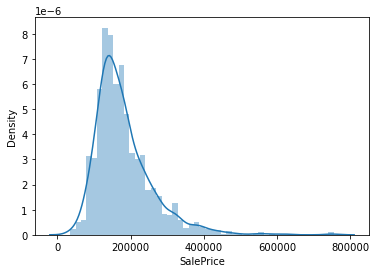

In [11]:
# check target variable distribution
sns.distplot(df_train['SalePrice'])

Indeed, there is a little deviation from the distribution, but still, it looks great

# 2. 'SalePrice' and dependencies
As I've already said, there are some features that may correlate with SalePrice more than others. Let's check the top 10 features that correlate with SalePrice.

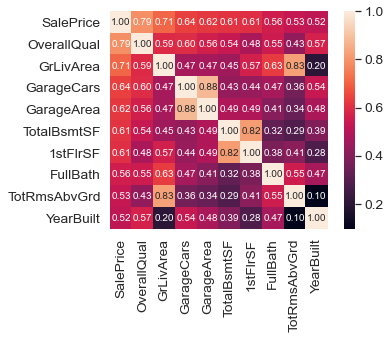

In [12]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
corrmat = df_train.corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

There is a clear relation of SalePrice with OverallQual and GrLivArea. It is surprising that YrSold has weak correlation with SalePrice, and TotalBsmtSF has a mediocre relation with target variable. Let's look closer at these. GarageCars and GarageArea look suspiciously identical, we'll definitely check them later.

### Relationship with numerical variables

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


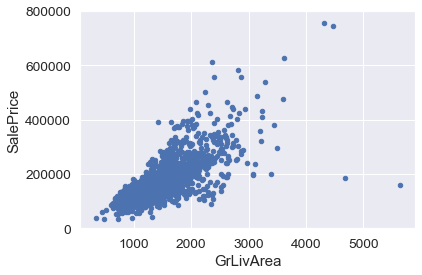

In [13]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


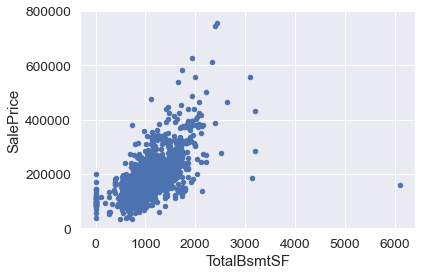

In [14]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

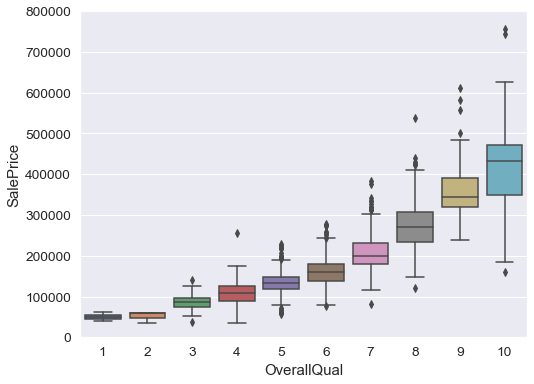

In [15]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

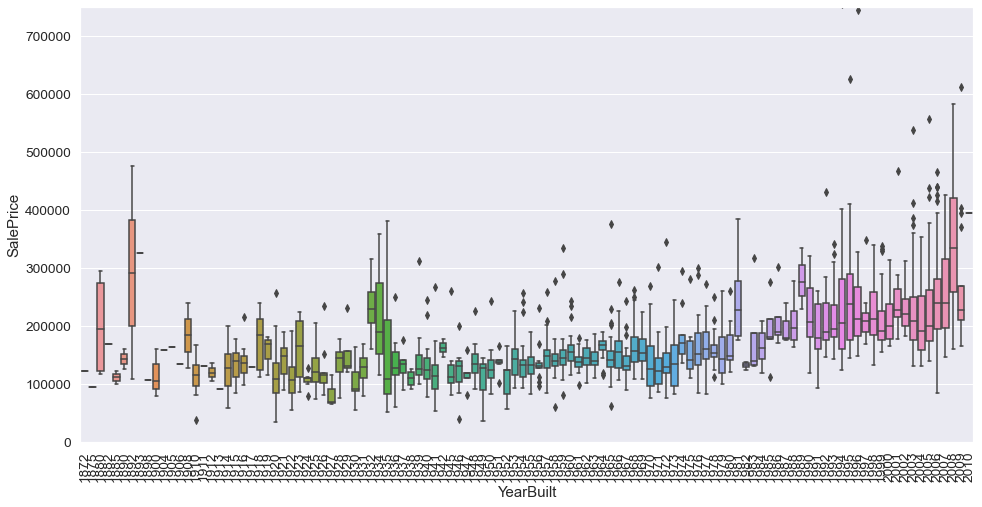

In [16]:
#box plot YearBuilt/saleprice
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=750000);
plt.xticks(rotation=90);

Although it's not a strong tendency, It looks like 'SalePrice' has a steady increase relative to the yearbuilt.

### In summary

We can conclude that:

* 'GrLivArea' and 'TotalBsmtSF' seem to be linearly related with 'SalePrice' and both relationships are positive. In the case of 'TotalBsmtSF', we can see that the slope of the linear relationship is particularly high.
* 'OverallQual' and 'YearBuilt' also seem to be related with 'SalePrice'. The relationship seems to be stronger in the case of 'OverallQual', where the box plot shows how sales prices increase with the overall quality.
* 'There are several houses that strongly deviate from the main distributions. We definitely should work with them later.

We just analysed four variables, but there are many other that we should analyse. The trick here seems to be the choice of the right features (feature selection) and not the definition of complex relationships between them.

#### All Scatter plots between 'SalePrice' and correlated variables

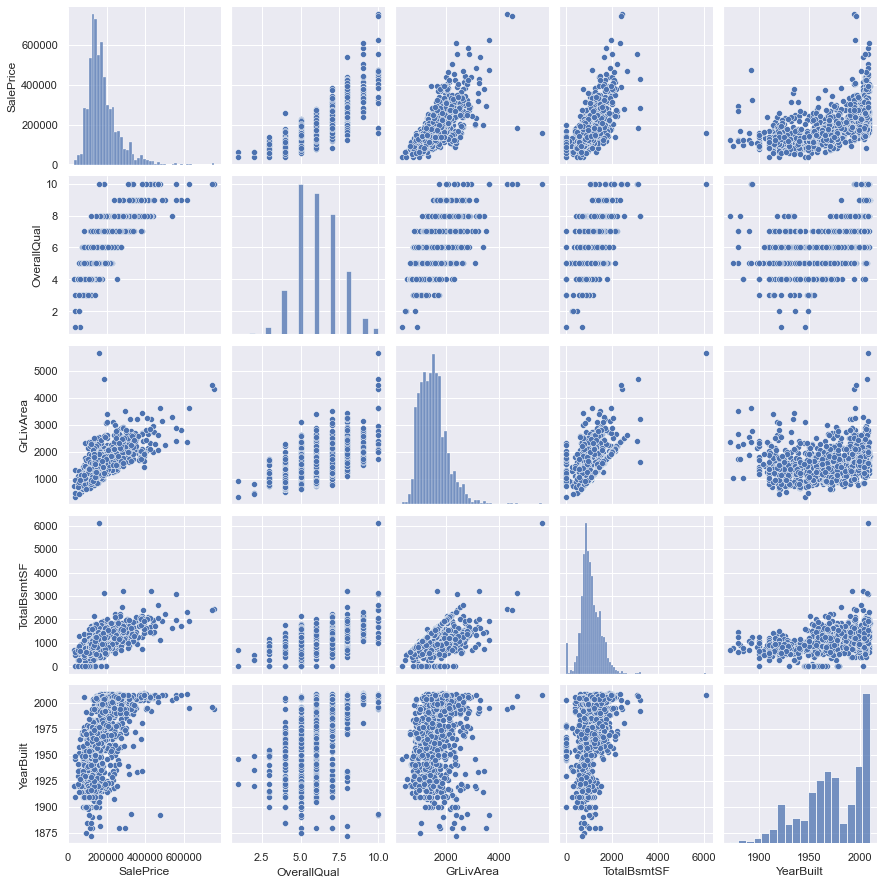

In [17]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

Although we already know some of the main figures, this mega scatter plot gives us a reasonable idea about variables relationships.

One of the figures we may find interesting is the one between 'TotalBsmtSF' and 'GrLiveArea'. In this figure we can see the dots drawing a linear line, which almost acts like a border. It totally makes sense that the majority of the dots stay below that line. Basement areas can be equal to the above ground living area, but it is not expected a basement area bigger than the above ground living area (unless you're trying to buy a bunker).

The plot concerning 'SalePrice' and 'YearBuilt' can also make us think. In the bottom of the plot, we see what almost appears to be an exponential function.

# 3. Missing data

As machine learning (and basically everything) requires clear data, we need to consider what to do with missing data.

Important questions when we are thinking about missing data:

* Can we allow ourselves to delete rows or columns with missing data?
* Which values should we substitute instead of NaN?

In our case, it is recommended to fill the missing data as our dataset is already very small (only 1460 entries). As for numeric features, we should analyse the particular feature to make a decision, which values to substitute. First, let's look at the amount of NaNs in the data.

In [18]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print('Total amount of NaNs: {}'.format(missing_data['Total'].sum()))
missing_data.head(20)

Total amount of NaNs: 6965


,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


Let's analyse this to understand how to handle the missing data.

If we look at PoolQC description, we see, that NaN stands for pool absence. Only 7 houses have pool, which make only 0.5% of our dataset. The feature will not make almost any difference to the final result, so we should delete it as it may contribute to model overfitting.

We can say the same for MiscFeature, Alley and Fence. The amount of abscent data will influence the weight of these features almost to zero. Let's get rid of them too.

For everything else, if a feature is categorial, then we'll replace NaN with 'No'. In case of numeric feature (there are only LotFrontage, GarageYrBlt and MasVnrArea), we need deeper investigation. Let's check the features.

In [19]:
df_train[['LotFrontage', 'GarageYrBlt', 'MasVnrArea']].describe()

,LotFrontage,GarageYrBlt,MasVnrArea
count,1201.000000,1379.000000,1452.000000
mean,70.049958,1978.506164,103.685262
std,24.284752,24.689725,181.066207
min,21.000000,1900.000000,0.000000
25%,59.000000,1961.000000,0.000000
50%,69.000000,1980.000000,0.000000
75%,80.000000,2002.000000,166.000000
max,313.000000,2010.000000,1600.000000


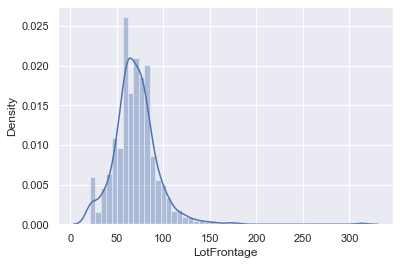

In [20]:
sns.distplot(df_train['LotFrontage']);

From these numbers, we can see that the distribution of MasVnrArea is quite bad. Let's delete it. As for GarageYrBlt, I'm going to replace NaNs with 1960, as it is unusual for modern houses not to have a YrBlt. In case of LotFrontage, I'm going to replace NaNs with median.

In [21]:
#dealing with missing data
df_train = df_train.drop('MasVnrArea', axis=1)
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(1960)
df_train['LotFrontage'] = df_train['LotFrontage'].fillna(df_train['LotFrontage'].mean())
df_train = df_train.fillna('No')
df_train.isnull().sum().max() #just checking that there's no missing data missing...

0

# 4. Outliers

Outliers is also something that we should be aware of. Outliers can strongly affect our models. We already know that there are some outliers in our data. Let's look at the plot again.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


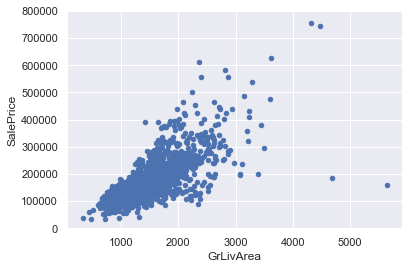

In [22]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

What has been revealed:

* The two values with bigger 'GrLivArea' seem strange and they are not following the crowd. We can speculate why this is happening. Maybe they refer to agricultural area and that could explain the low price. I'm not sure about this but I'm quite confident that these two points are not representative of the typical case. Therefore, we'll define them as outliers and delete them.
* The two observations in the top of the plot look like two special cases, however they seem to be following the trend. For that reason, we will keep them.

In [23]:
#deleting points
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


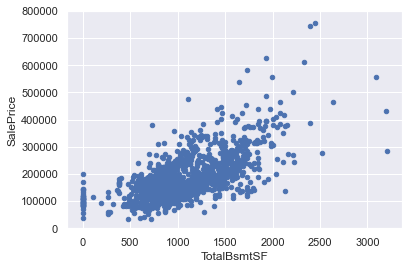

In [24]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

We can feel tempted to eliminate some observations (e.g. TotalBsmtSF > 3000) but I suppose it's not worth it. The points looks like following the trend, so we won't do anything. We also have to check GarageCars and GarageArea, as the correlation between them and target variable make them quite suspicious.

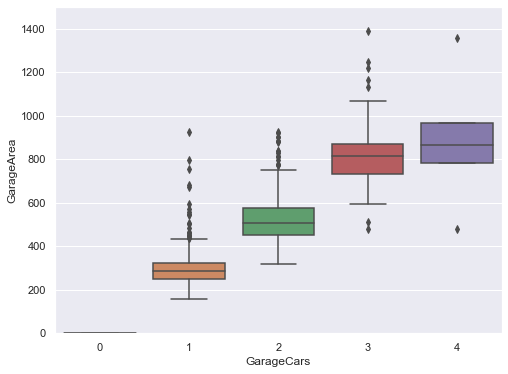

In [25]:
var = 'GarageCars'
data = pd.concat([df_train['GarageArea'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="GarageArea", data=data)
fig.axis(ymin=0, ymax=1500);

From this we can see that the corellation between these features is quite high indeed. These features depict almost the same and I'll delete GarageCars, because GarageArea is numeric feature that will affect our model better.

In [26]:
df_train = df_train.drop('GarageCars', axis = 1)

# 5. Normalizing main variables

Because I still don't have statistics classes at HSE, these steps won't be reinforced with theory. I'm doing machine learning for 2 years now, and I know some tricks to improve overall model quality. Here, we'll apply log transformation(where possible) to normalize some of the features. We also shouldn't forget to use exp function on the final result(as our model will predict log(SalePrice))

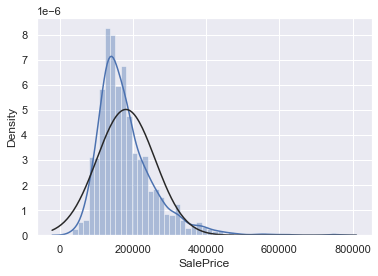

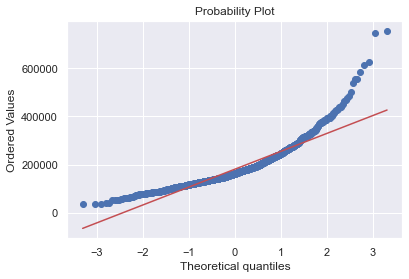

In [27]:
#histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

In [ ]:
df_train['SalePrice'] = np.log(df_train['SalePrice'])

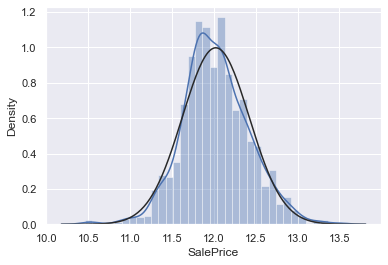

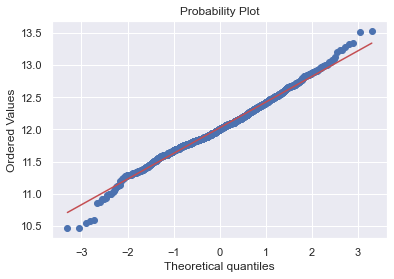

In [29]:
#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

Done! The plots look much better now. Let's check what's going on with 'GrLivArea'.

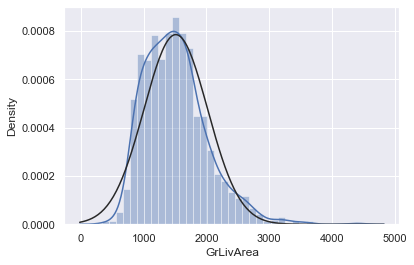

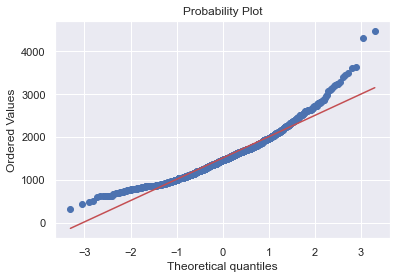

In [30]:
#histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

In [31]:
#data transformation
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

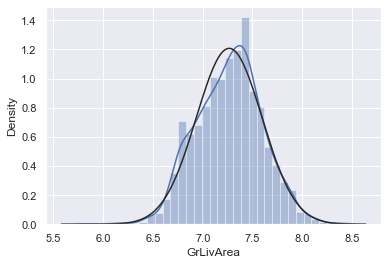

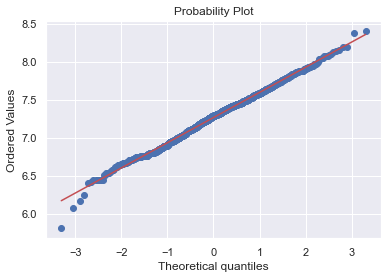

In [32]:
#transformed histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

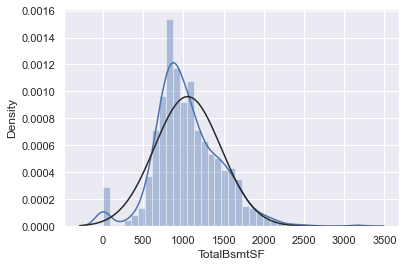

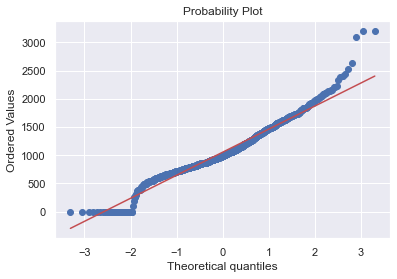

In [33]:
#histogram and normal probability plot
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

Here, we can see a lot of values been zeroes, which doesn't allow us to apply log function. Unfortunately, I'll have to leave it like this.

## Last but not the least, dummy variables

For our model, we have to transform categorial variables to numeric.

In [34]:
#convert categorical variable into dummy
df_train = pd.get_dummies(df_train)

# This is the part where work with data and analysis ends. If you don't want to see machine learning, skip the next part. I'm struggling in my life, so BPs are very appreciated :)

# 6. Preparing data for machine learning and choosing algorithm
Here, We need to get a target variable, and find the best working.
### Metrics choosing
I'm going to use two metrics: RMSE and RMSLE. RMSE is good, because the distribution of our target variable doesn't affect it, and RMSLE because it is the metric that is used in kaggle contest. I will not consider R2 or MAPE, as they heavily rely on balanced target variable (and I don't want to use them because of my problems with them in the past).

In [30]:
# import all the stuff needed.
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyRegressor
import xgboost as xgb
import lightgbm as lgb
import time

First, we have to separate target variable and then divide our data in train and test parts in order to avoid data leak.

In [31]:
y = df_train['SalePrice']
X = df_train.drop('SalePrice', axis = 1)
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

Now, let's define our metrics and add cross validation.

In [1]:
n_folds = 5
def rmsle_cv(model, X, y):
    kf = KFold(n_folds, shuffle=True, random_state=42)
    rmsle= np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv = kf))
    return(rmsle)

def rmse_cv(model, X, y):
    kf = KFold(n_folds, shuffle=True, random_state=41)
    rmse= -cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv = kf)
    return(rmse)

Now we can start testing algorithms. Please note, that I'm going to use XGBoost and LGBM for testing (they both require installation). 

We'll check first without tuning the algorithms. We'll also measure time as it plays important role(However, this dataset is very small, so time is not a big concern, but for huge datasets(ex. 400000x15), time is the most precious factor). 

Also, let's create a baseline (Dummy regressor) to better track the quality of our algorithms.

In [33]:
%%time
# DummyRegressor
DR = DummyRegressor()
score = rmse_cv(DR, trainX, trainY)
print("Baseline RMSE score: {:.3f} ({:.3f})\n" .format(score.mean(), score.std()))
print('-'*40)
score = rmsle_cv(DR, trainX, trainY)
print("XGB RMSLE score: {:.3f} ({:.3f})\n" .format(score.mean(), score.std()))

Baseline RMSE score: 0.157 (0.015)

----------------------------------------
XGB RMSLE score: 0.396 (0.021)

Wall time: 40.9 ms


In [34]:
%%time
# GradientBoost
GB = GradientBoostingRegressor(random_state=42)
score = rmse_cv(GB, trainX, trainY)
print("BM RMSE score: {:.3f} ({:.3f})\n" .format(score.mean(), score.std()))
print('-'*40)
score = rmsle_cv(GB, trainX, trainY)
print("XGB RMSLE score: {:.3f} ({:.3f})\n" .format(score.mean(), score.std()))

BM RMSE score: 0.016 (0.001)

----------------------------------------
XGB RMSLE score: 0.134 (0.011)

Wall time: 6.19 s


In [35]:
%%time
# XGBoost
model_xgb = xgb.XGBRegressor(random_state=42)
score = rmse_cv(model_xgb, trainX, trainY)
print("XGB RMSE score: {:.3f} ({:.3f})" .format(score.mean(), score.std()))
print('-'*40)
score = rmsle_cv(model_xgb, trainX, trainY)
print("XGB RMSLE score: {:.3f} ({:.3f})\n" .format(score.mean(), score.std()))

XGB RMSE score: 0.020 (0.001)
----------------------------------------
XGB RMSLE score: 0.145 (0.010)

Wall time: 4.88 s


In [36]:
%%time
# LightGBM
model_lgb = lgb.LGBMRegressor(random_state=42)
score = rmse_cv(model_lgb, trainX, trainY)
print("LGBM RMSE score: {:.3f} ({:.3f})" .format(score.mean(), score.std()))
print('-'*40)
score = rmsle_cv(model_lgb, trainX, trainY)
print("LGB RMSLE score: {:.3f} ({:.3f})\n" .format(score.mean(), score.std()))

LGBM RMSE score: 0.018 (0.001)
----------------------------------------
LGB RMSLE score: 0.136 (0.010)

Wall time: 2.85 s


In [37]:
%%time
# RandomForest
RF = RandomForestRegressor(random_state=42)
score = rmse_cv(RF, trainX, trainY)
print("RF RMSE score: {:.3f} ({:.3f})" .format(score.mean(), score.std()))
print('-'*40)
score = rmsle_cv(RF, trainX, trainY)
print("LGB RMSLE score: {:.3f} ({:.3f})\n" .format(score.mean(), score.std()))

RF RMSE score: 0.021 (0.002)
----------------------------------------
LGB RMSLE score: 0.136 (0.010)

Wall time: 10.3 s


We have to keep in mind that algorithms train 2 times in order to get both metrics. In reality, it is better to get all metrics from a single train, but with this dataset, I can allow myself not optimising everything. This implies that measured time is actually doubled, so algorithm actually work twice as fast.

Analysing the results, we can see, that GB got the best result on both metrics. However, 3 times slower relative to LightGBM. Having this, In my opinion, it is better to choose LGBM, as its speed gives us an option to load it more with hyperparameters.

# The end?
This is the part when the author gets lazy and decided not to continue. There are several steps that can increase accuracy, for example feature selection, feature engineering, optimising hyperparameters and model stacking. Unfortunately, session is ahead and I have to get prepared for the exams. Bonus points are appreciated.

In case of doubts that I did all of this, here is the link for my project on github that I did ~half a year ago.
https://github.com/Brilliance1512/dataproject